In [45]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

In [28]:
def get_raw_df():
    return pd.read_csv(r"C:\Users\91910\Desktop\IIT_Kanpur\Semester6\MSE643A\Project\bandGap\dielectric_constant_data.csv")

def get_propsFromStruct(df): #returns len, angles and periodic properties of a crystal structure for all compounds
    structure_arr = []

    for struct in df['structure']:
        finalStruct_arr = []
        modLen_arr = []
        modAngl_arr = []
        #modPerio_arr = []
        split_arr = struct.split('\n')
        len_arr = split_arr[2].split()[2:]
        angl_arr = split_arr[3].split()[1:]
        #perio_arr = split_arr[4].split()[2:]
        for i in range(3):
            modLen_arr.append(float(len_arr[i]))
            modAngl_arr.append(float(angl_arr[i]))
        for ele in modLen_arr:
            finalStruct_arr.append(ele)
        for ele in modAngl_arr:
            finalStruct_arr.append(ele)
#         for ele in perio_arr:
#             finalStruct_arr.append(ele)
        structure_arr.append(finalStruct_arr)
        
    return np.array(structure_arr)

def transform_raw_e_electronic(df): #transforms e_electronic into model readable values
    res = []
    for tensor_per_struct in df['e_electronic']:
        tensor_split = tensor_per_struct[2:-2].split(',')
        for i in range(len(tensor_split)):
            if (i==2 or i==5):
                tensor_split[i] = tensor_split[i].strip()[:-1]
            elif (i==3 or i==6):
                tensor_split[i] = tensor_split[i].strip()[1:]
        for j in range(len(tensor_split)):
            tensor_split[j] = float(tensor_split[j])
        res.append(tensor_split)
    return np.array(res)

def transform_raw_e_total(df): #transforms e_total into model readable values
    res = []
    for tensor_per_struct in df['e_total']:
        tensor_split = tensor_per_struct[2:-2].split(',')
        for i in range(len(tensor_split)):
            if (i==2 or i==5):
                tensor_split[i] = tensor_split[i].strip()[:-1]
            elif (i==3 or i==6):
                tensor_split[i] = tensor_split[i].strip()[1:]
        for j in range(len(tensor_split)):
            tensor_split[j] = float(tensor_split[j])
        res.append(tensor_split)
    return np.array(res)

def get_mod_df():
    raw_df = get_raw_df()
    mod_df = raw_df.copy()
    mod_df.drop(raw_df.columns[[0,1,2,6,8,9,14,15,16]], inplace= True, axis= 1)
    transformed_e_electronic = transform_raw_e_electronic(raw_df)
    transformed_e_total = transform_raw_e_total(raw_df)
    propsFromStruct_arr = get_propsFromStruct(raw_df)
    for i in range(9):
        mod_df['e_e_' + str(i)] = transformed_e_electronic[:, i]
    for i in range(9):
        mod_df['e_t_' + str(i)] = transformed_e_total[:, i]
    mod_df['len_a'] = propsFromStruct_arr[:,0]
    mod_df['len_b'] = propsFromStruct_arr[:,1]
    mod_df['len_c'] = propsFromStruct_arr[:,2]
    mod_df['angl_alpha'] = propsFromStruct_arr[:,3]
    mod_df['angl_beta'] = propsFromStruct_arr[:,4]
    mod_df['angl_gamma'] = propsFromStruct_arr[:,5]
    #below are excluded as they are true for all the compounds
#     mod_df['prd_p'] = propsFromStruct_arr[:,6]
#     mod_df['prd_b'] = propsFromStruct_arr[:,7]
#     mod_df['prd_c'] = propsFromStruct_arr[:,8]
    return mod_df

def transform_boolData(df, col_name): #1d array must be given
    le = LabelEncoder()
    df[col_name] = le.fit_transform(df[col_name])
    
def scale_features(df):
    scaler = StandardScaler()
    scaled_df = scaler.fit_transform(df)
    return scaled_df
    
def normal_split(df, test_size, shuffle):
    X = df.drop('band_gap', axis=1)
    y = df['band_gap']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42, shuffle=shuffle)
    
    return (X_train, X_test, y_train, y_test)

def evaluate_metrics(y_test, y_preds):
    r2 = r2_score(y_test, y_preds)
    mae = mean_absolute_error(y_test, y_preds)
    evs = explained_variance_score(y_test, y_preds)

#     print('r2 score is ', r2)
#     print('mean absolute error is ', mae)
#     print('explained variance score is ', evs)
    
    return (r2, mae)

In [27]:
mod_df = get_mod_df()

mod_df

,nsites,space_group,volume,band_gap,n,poly_electronic,poly_total,pot_ferroelectric,e_e_0,e_e_1,...,e_t_5,e_t_6,e_t_7,e_t_8,len_a,len_b,len_c,angl_alpha,angl_beta,angl_gamma
0,3,225,159.501208,1.88,1.86,3.44,6.23,False,3.441158,-3.097000e-05,...,2.481000e-05,-0.000095,2.175000e-05,6.235207,6.087322,6.087322,6.087323,60.000003,60.000002,59.999999
1,3,166,84.298097,3.52,1.78,3.16,6.73,False,3.346884,-4.498543e-02,...,-9.046643e-01,-1.463589,-9.046600e-01,3.945366,6.710024,6.710024,6.710023,34.019895,34.019897,34.019896
2,3,164,108.335875,1.17,2.23,4.97,10.64,False,5.543085,-5.280000e-06,...,4.435100e-04,0.000123,4.420300e-04,4.315681,4.158086,4.158086,7.235270,90.000000,90.000000,120.000001
3,4,186,88.162562,1.12,2.65,7.04,17.99,False,7.093167,7.990000e-06,...,2.064269e-02,-0.008708,1.761772e-02,20.396643,4.132865,4.132865,5.960067,90.000000,90.000000,119.999995
4,6,136,82.826401,2.87,1.53,2.35,7.12,False,2.423962,7.452000e-05,...,1.344158e-02,0.001279,1.441676e-02,7.459124,3.354588,4.968952,4.968952,90.000000,90.000000,90.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1051,7,111,212.493121,0.87,2.77,7.67,11.76,True,7.748968,0.000000e+00,...,0.000000e+00,0.000000,0.000000e+00,11.562826,5.912075,5.912075,6.079460,90.000000,90.000000,90.000000
1052,8,194,220.041363,3.60,2.00,3.99,7.08,True,4.405044,6.100000e-07,...,-1.000000e-08,0.000000,-1.000000e-08,3.696193,4.137833,4.137856,14.839681,90.000000,90.000000,119.999810
1053,4,216,73.882306,0.14,14.58,212.61,232.60,True,212.607502,-1.843000e-05,...,1.830120e-03,0.002588,1.830120e-03,232.596394,4.709974,4.709973,4.709974,59.999995,59.999999,60.000000
1054,5,221,177.269065,0.21,2.53,6.41,22.44,True,6.405117,0.000000e+00,...,0.000000e+00,0.000000,0.000000e+00,22.438270,5.617516,5.617516,5.617516,90.000000,90.000000,90.000000


In [37]:
def scaled_train_test_split_analysis(model, df):
    output = []
    for test_size in [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]:
        X_train, X_test, y_train, y_test = normal_split(df, test_size, True)
        scaled_X_train = scale_features(X_train)
        scaled_y_train = scale_features(np.array(y_train).reshape(len(y_train),1))
        scaled_X_test = scale_features(X_test)
        scaled_y_test = scale_features(np.array(y_test).reshape(len(y_test),1))
        model.fit(scaled_X_train, scaled_y_train)
        y_preds = model.predict(scaled_X_test)
        r2, mae = evaluate_metrics(scaled_y_test, y_preds)
        output.append((r2, mae))
    r2_scores = []
    mae_scores = []
    for tup in output:
        r2_scores.append(tup[0])
        mae_scores.append(tup[1])
    return r2_scores, mae_scores

In [39]:
model = svm.SVR()
svr_r2_scores, svr_mae_scores = scaled_train_test_split_analysis(model, mod_df)

C:\Users\91910\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\91910\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\91910\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\91910\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

In [40]:
model = DecisionTreeRegressor()
DT_r2_scores, DT_mae_scores = scaled_train_test_split_analysis(model, mod_df)

In [41]:
model = RandomForestRegressor()
RF_r2_scores, RF_mae_scores = scaled_train_test_split_analysis(model, mod_df)

C:\Users\91910\AppData\Local\Temp\ipykernel_17880\3729297804.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(scaled_X_train, scaled_y_train)
C:\Users\91910\AppData\Local\Temp\ipykernel_17880\3729297804.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(scaled_X_train, scaled_y_train)
C:\Users\91910\AppData\Local\Temp\ipykernel_17880\3729297804.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(scaled_X_train, scaled_y_train)
C:\Users\91910\AppData\Local\Temp\ipykernel_17880\3729297804.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exa

In [42]:
model = GradientBoostingRegressor()
GB_r2_scores, GB_mae_scores = scaled_train_test_split_analysis(model, mod_df)

C:\Users\91910\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\91910\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\91910\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\91910\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

In [43]:
model = KNeighborsRegressor()
KNN_r2_scores, KNN_mae_scores = scaled_train_test_split_analysis(model, mod_df)

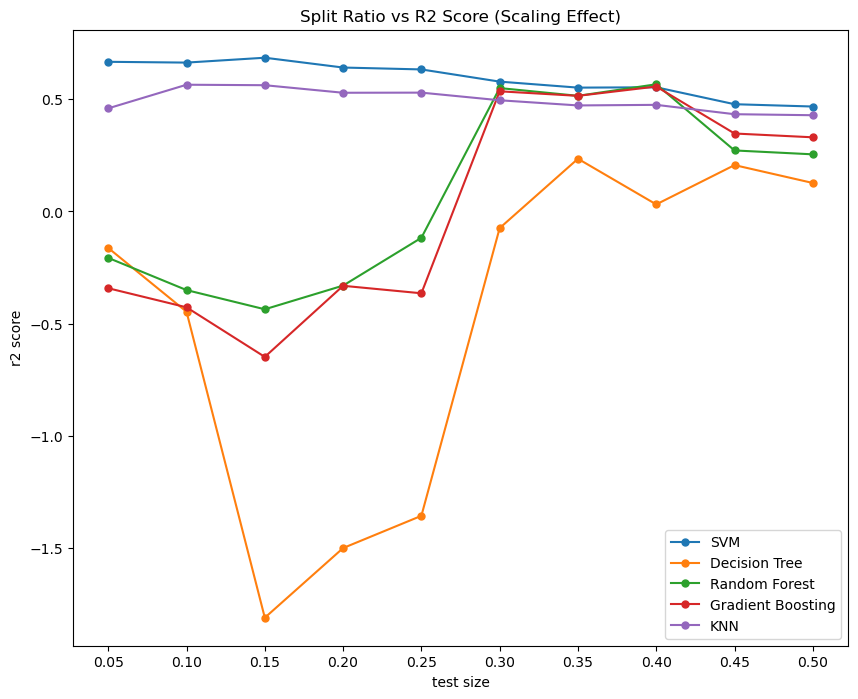

In [46]:
plt.figure(figsize=(10, 8))
test_size = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]
plt.plot(test_size, svr_r2_scores, label='SVM', marker='o', markersize=5.0)
plt.plot(test_size, DT_r2_scores, label='Decision Tree', marker='o',  markersize=5.0)
plt.plot(test_size, RF_r2_scores, label='Random Forest', marker='o',  markersize=5.0)
plt.plot(test_size, GB_r2_scores, label='Gradient Boosting', marker='o',  markersize=5.0)
plt.plot(test_size, KNN_r2_scores, label='KNN', marker='o',  markersize=5.0)

plt.xticks([0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5])
plt.title('Split Ratio vs R2 Score (Scaling Effect)')
plt.xlabel('test size')
plt.ylabel('r2 score')
plt.legend()
plt.show()

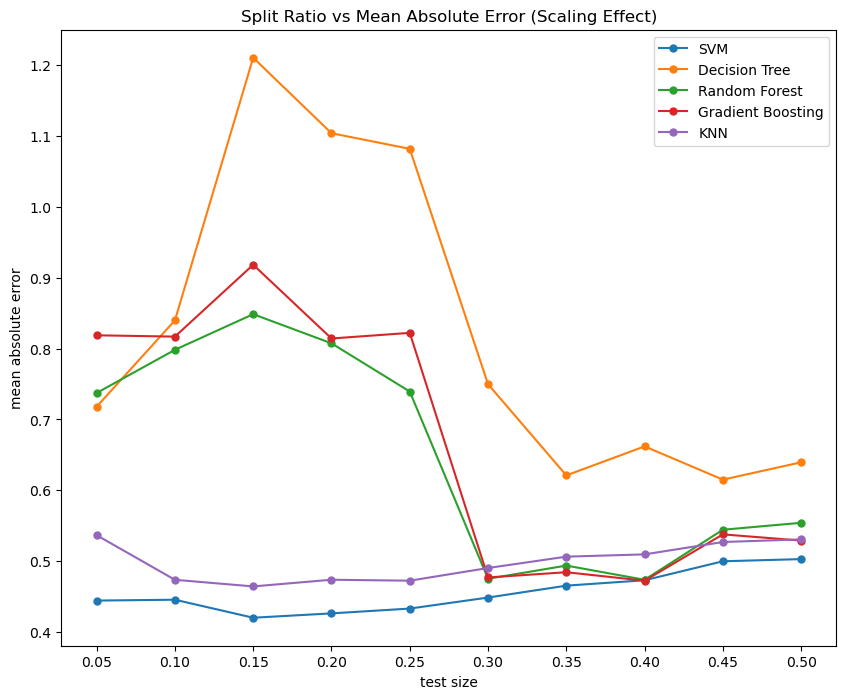

In [47]:
plt.figure(figsize=(10, 8))
test_size = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]
plt.plot(test_size, svr_mae_scores, label='SVM', marker='o', markersize=5.0)
plt.plot(test_size, DT_mae_scores, label='Decision Tree', marker='o',  markersize=5.0)
plt.plot(test_size, RF_mae_scores, label='Random Forest', marker='o',  markersize=5.0)
plt.plot(test_size, GB_mae_scores, label='Gradient Boosting', marker='o',  markersize=5.0)
plt.plot(test_size, KNN_mae_scores, label='KNN', marker='o',  markersize=5.0)

plt.xticks([0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5])
plt.title('Split Ratio vs Mean Absolute Error (Scaling Effect)')
plt.xlabel('test size')
plt.ylabel('mean absolute error')
plt.legend()
plt.show()

In [11]:
X_train, X_test, y_train, y_test = normal_split(mod_df, 0.15, True)

X_train

,nsites,space_group,volume,n,poly_electronic,poly_total,pot_ferroelectric,e_e_0,e_e_1,e_e_2,...,e_t_5,e_t_6,e_t_7,e_t_8,len_a,len_b,len_c,angl_alpha,angl_beta,angl_gamma
12,3,225,69.537895,2.23,4.97,8.42,False,4.967592,0.000034,-0.000012,...,-1.039000e-04,-1.559700e-04,-1.038100e-04,8.423227,4.615785,4.615784,4.615784,60.000001,60.000005,60.000003
307,12,189,343.822654,2.73,7.48,12.79,False,6.460945,0.000078,-0.000043,...,-1.641700e-04,-3.729000e-05,-1.133700e-04,16.965765,8.100385,8.100386,6.050517,90.000000,90.000000,120.000000
371,14,15,191.599724,1.65,2.71,5.99,False,2.687373,-0.100676,-0.011132,...,7.393600e-01,6.748203e-01,7.393430e-01,6.151129,5.534123,5.534123,7.312596,68.035217,68.035221,87.064735
914,7,82,189.718519,2.73,7.44,11.06,True,7.430698,0.013192,0.022335,...,7.963423e-02,6.357474e-02,7.962866e-02,11.122676,5.875322,5.875322,6.889534,115.238976,115.238979,89.999999
290,8,176,349.831956,1.49,2.22,2.37,True,2.404893,-0.000066,-0.000035,...,1.439000e-05,-3.330000e-06,8.720000e-06,1.853091,7.000120,7.000121,8.243618,90.000000,90.000000,120.000006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330,8,194,353.715043,2.84,8.09,13.83,False,7.718620,-0.000011,-0.000034,...,-1.217060e-03,-2.653100e-04,-1.092290e-03,14.939210,6.127727,6.127727,10.877375,90.000000,90.000000,120.000005
466,4,166,54.633956,2.15,4.62,10.55,True,4.970524,0.000000,0.000000,...,4.730000e-06,-1.000000e-08,4.730000e-06,8.637382,6.529411,6.529411,6.529411,28.121970,28.121970,28.121968
121,5,217,87.578887,1.28,1.63,2.17,False,1.630283,0.000035,0.000021,...,-1.544160e-03,-2.505900e-04,-1.514870e-03,2.168502,4.845521,4.845520,4.845520,109.471215,109.471213,109.471224
1044,4,166,139.017820,2.26,5.12,13.09,True,5.473830,-0.056863,-0.338594,...,-1.057886e+00,-1.743245e+00,-1.057886e+00,9.109768,8.403218,8.403219,8.403218,30.925733,30.925731,30.925728


In [20]:
scaled_X_train = scale_features(X_train)
scaled_X_test = scale_features(X_test)
scaled_y_train = scale_features(np.array(y_train).reshape(len(y_train), 1))
scaled_y_test = scale_features(np.array(y_test).reshape(len(y_test), 1))

scaled_X_train_df = pd.DataFrame(scaled_X_train, columns= X_train.columns)
scaled_X_test_df = pd.DataFrame(scaled_X_test, columns= X_test.columns)

scaled_X_train_df

,nsites,space_group,volume,n,poly_electronic,poly_total,pot_ferroelectric,e_e_0,e_e_1,e_e_2,...,e_t_5,e_t_6,e_t_7,e_t_8,len_a,len_b,len_c,angl_alpha,angl_beta,angl_gamma
0,-1.340771,1.214008,-0.987606,-0.166001,-0.164286,-0.320187,-1.443078,-0.159011,0.003860,0.055731,...,0.086025,0.070844,0.085695,-0.298607,-0.449188,-0.607796,-0.912477,-0.941921,-0.943533,-0.945957
1,1.312832,0.674723,1.803029,0.261636,0.017055,-0.108902,-1.443078,-0.074916,0.004219,0.055598,...,0.085898,0.071035,0.085675,0.194468,1.629232,1.407723,-0.372381,0.360211,0.377650,1.286067
2,1.902521,-1.931817,0.254279,-0.662060,-0.327565,-0.437675,-1.443078,-0.287416,-0.821258,0.007702,...,1.647457,1.154419,1.647044,-0.429753,0.098562,-0.076622,0.102720,-0.593158,-0.589667,0.060862
3,-0.161392,-0.928149,0.235139,0.261636,0.014165,-0.192546,0.692963,-0.020307,0.111656,0.152252,...,0.254398,0.173154,0.254051,-0.142795,0.302073,0.120730,-0.056539,1.455694,1.489160,0.170055
4,0.133453,0.479982,1.864169,-0.798904,-0.362967,-0.612698,0.692963,-0.303324,0.003034,0.055633,...,0.086275,0.071089,0.085932,-0.677835,0.972969,0.771321,0.453197,0.360211,0.377650,1.286067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
892,0.133453,0.749624,1.903677,0.355716,0.061126,-0.058620,-1.443078,-0.004093,0.003486,0.055634,...,0.083674,0.070668,0.083608,0.077495,0.452623,0.266723,1.444657,0.360211,0.377650,1.286067
893,-1.045927,0.330181,-1.139242,-0.234423,-0.189573,-0.217204,0.692963,-0.158846,0.003578,0.055782,...,0.086254,0.071094,0.085924,-0.286246,0.692211,0.499059,-0.192105,-2.325569,-2.347423,-2.131833
894,-0.751082,1.094167,-0.804053,-0.978511,-0.405593,-0.622368,-1.443078,-0.346944,0.003866,0.055872,...,0.082984,0.070692,0.082715,-0.659630,-0.312160,-0.474915,-0.825994,1.205347,1.235150,0.894392
895,-1.045927,0.330181,-0.280701,-0.140343,-0.153449,-0.094398,0.692963,-0.130504,-0.462295,-1.406643,...,-2.147560,-2.727427,-2.147823,-0.258980,1.809859,1.582883,0.513277,-2.203873,-2.223947,-2.027532


In [23]:
regr1 = svm.SVR()
regr1.fit(scaled_X_train_df, scaled_y_train)
y_preds1 = regr1.predict(scaled_X_test_df)

evaluate_metrics(scaled_y_test, y_preds1)

r2 score is  0.6851387683408918
mean absolute error is  0.42026592144505015
explained variance score is  0.6930074074417292


C:\Users\91910\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [24]:
regr2 = KNeighborsRegressor()
regr2.fit(scaled_X_train_df, scaled_y_train)
y_preds2 = regr2.predict(scaled_X_test_df)

evaluate_metrics(scaled_y_test, y_preds2)

r2 score is  0.5626443946249098
mean absolute error is  0.46443097577929215
explained variance score is  0.5631303102112473
